In [2]:
import os
import fnmatch
from random import shuffle
import json
from src.config import config_io
from pathlib import Path
import json
import pandas as pd
import src.config as config

In [3]:
data_path = config.config_io.get('pan_19_processed_train')
print(data_path)
data = pd.read_csv(data_path)
data.shape

/home/sukanya/PhD/Datasets/PAN SCD/pan19-style-change-detection/processed/train.csv


(18961, 5)

In [4]:
data.head()

,problem,author_1,author_2,para1_text,para2_text
0,problem-1543.txt,A1,A1,Given an alphabet $\Sigma$ of size $k$ and two...,"\nThe paper ""Algorithmic Meta Theorems for Cir..."
1,problem-631.txt,A1,A3,"\nInstead of an actual GPS device, I would rec...","In the end, a seat post pump probably has the ..."
2,problem-631.txt,A3,A2,"In the end, a seat post pump probably has the ...",\nThanks for the help. Finally what I needed t...
3,problem-631.txt,A2,A1,\nThanks for the help. Finally what I needed t...,"\nIt might sound weird, but if you're finding ..."
4,problem-631.txt,A1,A2,"\nIt might sound weird, but if you're finding ...",This is a bit weird question. I bought a Speci...


In [5]:
# selecting those data points which have both paragraph lengths above the threshold min_para_size
data_len_list = []
same_author_percent_list = []
diff_author_percent_list = []
for min_para_size in range(0,2200,200):
    print("Min para size:", min_para_size)
    new_data = data[data.apply(lambda x : (len(x[3])> min_para_size) & (len(x[4])>min_para_size), axis = 1)]
    same_author_pairs = sum(new_data.apply(lambda x: x[1]==x[2], axis = 1))
    same_author_percentage = same_author_pairs/len(new_data)*100
    diff_author_percentage = 100 -same_author_percentage
    data_len_list.append(len(new_data))
    same_author_percent_list.append(same_author_percentage)
    diff_author_percent_list.append(diff_author_percentage)
    print("len:", len(new_data), "same_author percentage:", same_author_percentage, "diff author percentage:",diff_author_percentage )
    #new_data.to_csv('/home/sukanya/PhD/Results/15_Feb_PAN_dataset_size_increased/datasets/training_'+str(min_para_size)+".csv")

df = pd.DataFrame({"Dataset Size": data_len_list, 
                   "same author percentage": same_author_percent_list, 
                   "different author percentage": diff_author_percent_list}, index = list(range(0,2200,200)))

Min para size: 0
len: 18961 same_author percentage: 57.95053003533569 diff author percentage: 42.04946996466431
Min para size: 200
len: 13693 same_author percentage: 48.805959249251444 diff author percentage: 51.194040750748556
Min para size: 400
len: 8326 same_author percentage: 35.503242853711264 diff author percentage: 64.49675714628873
Min para size: 600
len: 5543 same_author percentage: 29.550784773588312 diff author percentage: 70.4492152264117
Min para size: 800
len: 3793 same_author percentage: 29.712628526232532 diff author percentage: 70.28737147376746
Min para size: 1000
len: 2481 same_author percentage: 34.3409915356711 diff author percentage: 65.6590084643289
Min para size: 1200
len: 1621 same_author percentage: 42.442936458975936 diff author percentage: 57.557063541024064
Min para size: 1400
len: 1201 same_author percentage: 47.71024146544546 diff author percentage: 52.28975853455454
Min para size: 1600
len: 920 same_author percentage: 52.93478260869565 diff author percen

In [6]:
for i in range(0,2000, 200):
    smaller = data[data.apply(lambda x : (len(x[3])< i) | (len(x[4])<i), axis = 1)]
    print(i, len(smaller))

0 0
200 5236
400 10607
600 13410
800 15158
1000 16473
1200 17340
1400 17758
1600 18040
1800 18235


In [22]:
smaller.shape

(10607, 5)

In [7]:
df

,Dataset Size,same author percentage,different author percentage
0,18961,57.950530,42.049470
200,13693,48.805959,51.194041
400,8326,35.503243,64.496757
600,5543,29.550785,70.449215
800,3793,29.712629,70.287371
1000,2481,34.340992,65.659008
1200,1621,42.442936,57.557064
1400,1201,47.710241,52.289759
1600,920,52.934783,47.065217
1800,726,57.713499,42.286501


In [8]:
#df['Address'] = address 
df['same author prop'] = df.apply(lambda x: x[0]*x[1]/100, axis = 1)
df['diff author prop'] = df.apply(lambda x: x[0]*x[2]/100, axis = 1)

In [52]:
df

,Dataset Size,same author percentage,different author percentage,same author prop,diff author prop
0,18961,57.950530,42.049470,10988.0,7973.0
200,13693,48.805959,51.194041,6683.0,7010.0
400,8326,35.503243,64.496757,2956.0,5370.0
600,5543,29.550785,70.449215,1638.0,3905.0
800,3793,29.712629,70.287371,1127.0,2666.0
1000,2481,34.340992,65.659008,852.0,1629.0
1200,1621,42.442936,57.557064,688.0,933.0
1400,1201,47.710241,52.289759,573.0,628.0
1600,920,52.934783,47.065217,487.0,433.0
1800,726,57.713499,42.286501,419.0,307.0


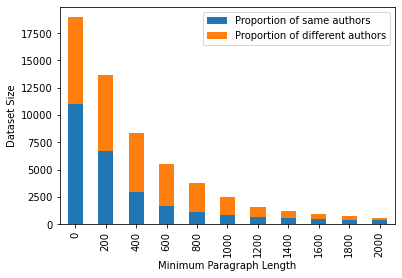

In [12]:
ax = df[['same author prop', 'diff author prop']].plot.bar(stacked=True)
ax.set(xlabel="Minimum Paragraph Length", ylabel="Dataset Size")
ax.legend(['Proportion of same authors', 'Proportion of different authors'])

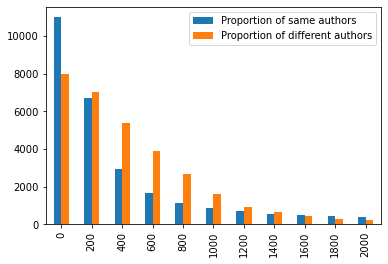

In [17]:
ax1 = df[['same author prop','diff author prop']].plot.bar()
ax1.legend(['Proportion of same authors', 'Proportion of different authors'])